In [1]:
import os
import torch
import numpy as np
import skimage.transform
import matplotlib.pyplot as plt
from easydict import EasyDict as edict

from main_monodepth_pytorch import Model
%reload_ext autoreload
%autoreload 2

/home/cluster/.conda/envs/3d_monodepth/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Train

Check if CUDA is available

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.device_count()

1

In [4]:
torch.cuda.empty_cache()

In [21]:
dict_parameters = edict({'data_dir':'data/kitti/posterior_train/',
                         'val_data_dir':'data/kitti/posterior_val/',
                         'model_path':'data/models/monodepth_resnet18_001.pth',
                         'output_directory':'data/output/',
                         'input_height':540,
                         'input_width':1920,
                         'model':'resnet18_md',
                         'pretrained':True,
                         'mode':'train',
                         'epochs':200,
                         'learning_rate':1e-4,
                         'batch_size': 8,
                         'adjust_lr':True,
                         'device':'cuda:0',
                         'do_augmentation':True,
                         'augment_parameters':[0.8, 1.2, 0.5, 2.0, 0.8, 1.2],
                         'print_images':False,
                         'print_weights':False,
                         'input_channels': 3,
                         'num_workers': 8,
                         'use_multiple_gpu': False})

In [22]:
model = Model(dict_parameters)
#model.load('data/models/monodepth_resnet18_001_last.pth')

Use a dataset with 63960 images
Use a dataset with 63506 images


In [23]:
model.train()

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 18 but got size 17 for tensor number 1 in the list.

## Test the model

In [5]:
dict_parameters_test = edict({'data_dir':'data/test_a',
                              'model_path':'data/models/monodepth_resnet18_001_cpt.pth',
                              'output_directory':'data/output/post/',
                              'input_height':540,
                              'input_width':1920,
                              'model':'resnet18_md',
                              'pretrained':False,
                              'mode':'test',
                              'device':'cuda:0',
                              'input_channels':3,
                              'num_workers':4,
                              'use_multiple_gpu':False})
model_test = Model(dict_parameters_test)

Use a dataset with 548 images
cuda:0


In [17]:
model_test.test()

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 18 but got size 17 for tensor number 1 in the list.

In [6]:
disp = np.load('data/output/post/disparities_pp.npy')  # Or disparities.npy for output without post-processing
disp.shape

(548, 256, 512)

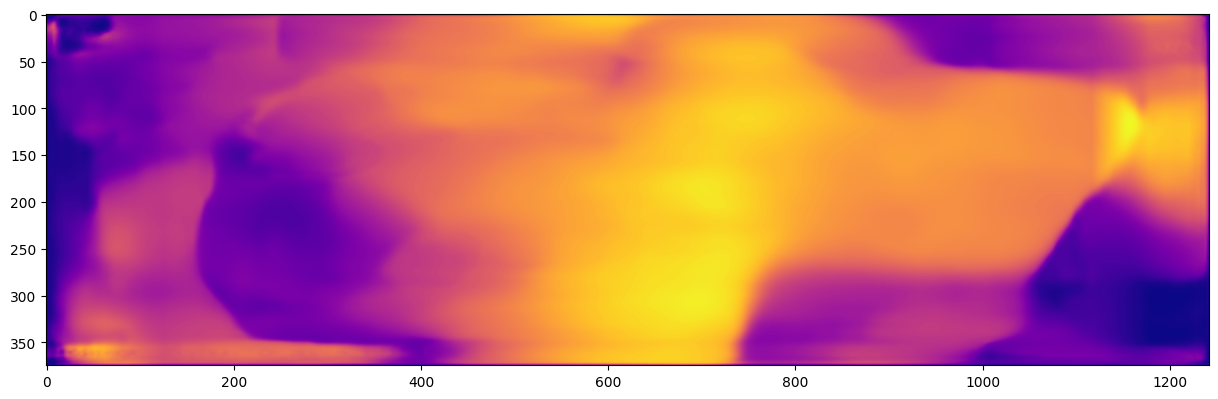

In [7]:
disp_to_img = skimage.transform.resize(disp[0].squeeze(), [375, 1242], mode='constant')
plt.imshow(disp_to_img, cmap='plasma')

Save a color image

In [8]:
plt.imsave(os.path.join(dict_parameters_test.output_directory,
                        dict_parameters_test.model_path.split('/')[-1][:-4]+'_test_output.png'), disp_to_img, cmap='plasma')

Save all test images

In [9]:
for i in range(disp.shape[0]):
    disp_to_img = skimage.transform.resize(disp[i].squeeze(), [375, 1242], mode='constant')
    plt.imsave(os.path.join(dict_parameters_test.output_directory,
               'pred_'+str(i)+'.png'), disp_to_img, cmap='plasma')

Save a grayscale image

In [22]:
plt.imsave(os.path.join(dict_parameters_test.output_directory,
                        dict_parameters_test.model_path.split('/')[-1][:-4]+'_gray.png'), disp_to_img, cmap='gray')